# Linear Regression

## Loading Ames Housing Dataset

In [7]:
import pandas as pd

selected_features = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

# ames_all = pd.read_csv('AmesHousing.csv')
# ames = ames_all[selected_features]

# shorter
df = pd.read_csv('AmesHousing.csv', usecols=selected_features)

print(df.head())

print(df.shape)


   Overall Qual  Overall Cond  Total Bsmt SF Central Air  Gr Liv Area  \
0             6             5         1080.0           Y         1656   
1             5             6          882.0           Y          896   
2             6             6         1329.0           Y         1329   
3             7             5         2110.0           Y         2110   
4             5             5          928.0           Y         1629   

   SalePrice  
0     215000  
1     105000  
2     172000  
3     244000  
4     189900  
(2930, 6)


## Data Conversion to Numericals

In [8]:
df['Central Air'] = df['Central Air'].map({'N' : 0, 'Y' : 1})
print(df.head())

   Overall Qual  Overall Cond  Total Bsmt SF  Central Air  Gr Liv Area  \
0             6             5         1080.0            1         1656   
1             5             6          882.0            1          896   
2             6             6         1329.0            1         1329   
3             7             5         2110.0            1         2110   
4             5             5          928.0            1         1629   

   SalePrice  
0     215000  
1     105000  
2     172000  
3     244000  
4     189900  


## Checking for Nulls

In [9]:
print(df.isnull().sum())

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64


because it's just one, and there are many rows, just remove it

In [11]:
df = df.dropna(axis=0)
print(df.isnull().sum())

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64


## Visualise Data

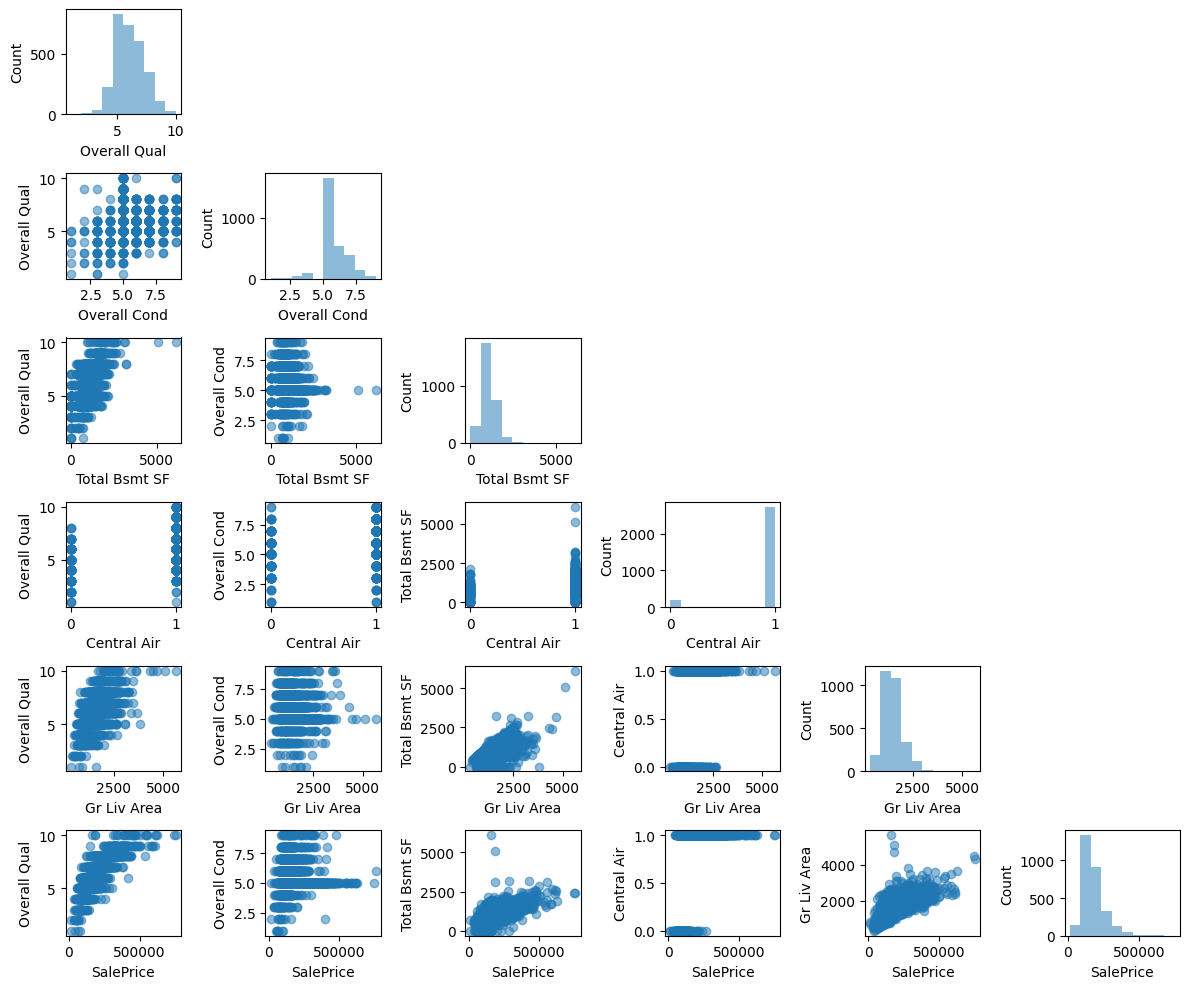

In [13]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(df.values,
                  figsize=(12, 10),
                  names=df.columns,
                  alpha=0.5
)
plt.tight_layout()
plt.show()

### Correlation Matrix

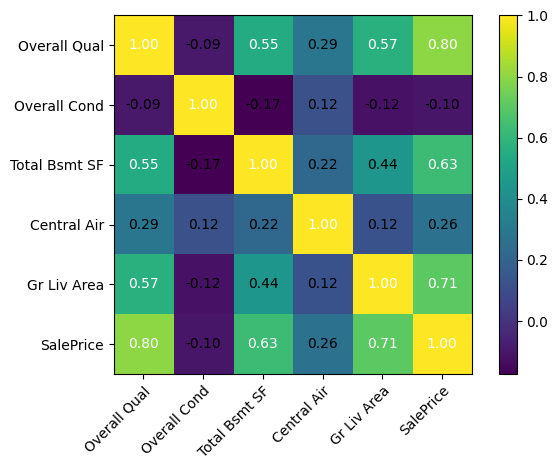

In [14]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm,
             row_names=df.columns,
             column_names=df.columns
             )
plt.tight_layout()
plt.show()

For the target value of SalesPrice, Gr Liv Area can be a good predictor as there is high correlation (why not Overall Qual???)

## Using the Scikit Learn Linear Regeression

Slope: 111.666
Intercept: 13342.979


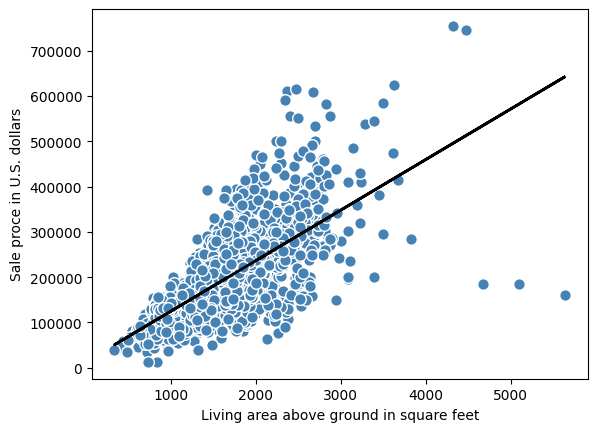

In [23]:
# use Gr Liv Area as feature, Sales Price as target

# [''] gives a column, [['','','']]  gives a sub Data Frame (here with only one column), value returns a Numpy array
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

def lin_regplot(X, y, model):
    plt.scatter(X, 
                y, 
                c='steelblue', 
                edgecolor='white', 
                s=70
                )
    plt.plot(X,
             model.predict(X),
             color='black',
             lw=2
             )

lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale proce in U.S. dollars')
plt.show()